# **Mini-Projet XAI — Attention is Not Explanation**

<div style="background: linear-gradient(135deg, #2c3e50 0%, #3498db 100%); padding: 30px; border-radius: 15px; margin: 20px 0; box-shadow: 0 4px 15px rgba(0,0,0,0.2);">
    <h2 style="color: white; text-align: center; margin: 0;">Analyse Critique du Mécanisme d'Attention comme Outil d'Explicabilité</h2>
    <p style="color: #ecf0f1; text-align: center; font-size: 14px; margin-top: 10px;">Une étude expérimentale basée sur les travaux de Jain & Wallace (2019) et Wiegreffe & Pinter (2019)</p>
</div>

---

## Informations du Projet

| Champ | Détail |
|:------|:-------|
| **Étudiants** | [Nom Étudiant 1] & [Nom Étudiant 2] |
| **Date** | Décembre 2025 |
| **Cours** | Explicabilité de l'IA (XAI) |
| **Type** | NLP / Étude Critique |

---

## Table des Matières

<div style="background: #f8f9fa; padding: 20px; border-radius: 10px; border-left: 5px solid #3498db;">

1. [Contexte & Motivation](#1)
2. [Intuition de la Méthode](#2)
3. [Formalisation Mathématique](#3)
4. [Implémentation Pratique](#4)
5. [Expériences & Visualisations](#5)
6. [Discussion Critique](#6)
7. [Conclusion & Points Clés](#7)
8. [Références](#8)

</div>

<a id="1"></a>
# 1. Contexte & Motivation

<div style="background: linear-gradient(to right, #e74c3c, #c0392b); padding: 3px; border-radius: 12px; margin: 15px 0;">
    <div style="background: white; padding: 20px; border-radius: 10px;">
        <h3 style="color: #c0392b;">Le Problème Fondamental</h3>
        <p>Les modèles Transformer (BERT, GPT, etc.) utilisent des <b>mécanismes d'attention</b> pour pondérer l'importance des tokens. De nombreux praticiens utilisent ces poids d'attention comme <b>« explications »</b> des décisions du modèle.</p>
        <p style="color: #e74c3c; font-weight: bold;">Mais cette pratique est-elle réellement fiable ?</p>
    </div>
</div>

## Objectifs du Projet

| Objectif | Description |
|:---------|:------------|
| **Analyser** | Examiner si l'attention capture réellement l'importance des features |
| **Comparer** | Confronter les explications par attention aux méthodes XAI établies (LIME, SHAP) |
| **Démontrer** | Identifier des cas où l'attention diverge de l'explication réelle |
| **Développer** | Former un esprit critique face aux heatmaps d'attention |

## Caractéristiques de l'Étude

| Propriété | Valeur |
|:----------|:-------|
| **Type d'explication** | Locale (per-instance) |
| **Domaine** | NLP / Texte |
| **Sortie** | Scores d'importance par token |
| **Famille XAI** | Gradient-free / Attention-based |

---

## Le Débat Scientifique : Deux Articles Fondateurs

Ce projet s'inscrit dans un débat académique majeur opposant deux visions de l'attention comme outil d'explicabilité :

<div style="display: flex; gap: 20px; margin: 20px 0;">
    <div style="flex: 1; background: linear-gradient(135deg, #c0392b 0%, #922b21 100%); padding: 25px; border-radius: 15px; color: white;">
        <h3>Article 1 : « Attention is Not Explanation »</h3>
        <p><b>Jain & Wallace — NAACL 2019</b></p>
        <hr style="border-color: rgba(255,255,255,0.3);">
        <p><b>Thèse principale :</b></p>
        <ul>
            <li>La permutation des poids d'attention ne modifie pas la prédiction</li>
            <li>Des distributions alternatives produisent les mêmes résultats</li>
            <li>Faible corrélation avec les méthodes gradient-based</li>
            <li>L'attention capture le <i>« où »</i> mais pas le <i>« pourquoi »</i></li>
        </ul>
    </div>
    <div style="flex: 1; background: linear-gradient(135deg, #27ae60 0%, #1e8449 100%); padding: 25px; border-radius: 15px; color: white;">
        <h3>Article 2 : « Attention is Not Not Explanation »</h3>
        <p><b>Wiegreffe & Pinter — EMNLP 2019</b></p>
        <hr style="border-color: rgba(255,255,255,0.3);">
        <p><b>Contre-arguments :</b></p>
        <ul>
            <li>Les tests de Jain & Wallace sont méthodologiquement trop stricts</li>
            <li>L'attention peut constituer une explication valide sous conditions</li>
            <li>Avec des contraintes appropriées, l'attention reste informative</li>
            <li>Distinction nécessaire entre <i>explication</i> et <i>explication fidèle</i></li>
        </ul>
    </div>
</div>

<div style="background: #2c3e50; padding: 20px; border-radius: 10px; margin: 15px 0; text-align: center;">
    <h3 style="color: white; margin: 0;">Objectif de ce Projet</h3>
    <p style="color: #bdc3c7; margin: 10px 0 0 0; font-size: 16px;">Reproduire expérimentalement ce débat et former notre propre analyse critique</p>
</div>

<a id="2"></a>
# 2. Intuition de la Méthode

<div style="background: #e8f4f8; padding: 25px; border-radius: 15px; margin: 15px 0; border: 2px solid #3498db;">
    <h3 style="color: #2980b9;">L'idée en termes simples</h3>
    <p style="font-size: 16px;">Considérons un <b>lecteur humain</b> analysant une phrase pour déterminer son sentiment. Il va naturellement <b>focaliser son attention</b> sur certains mots clés (adjectifs, négations, etc.).</p>
    <p style="font-size: 16px;">Les Transformers reproduisent ce comportement via leurs <b>poids d'attention</b>. Cependant, ces poids reflètent-ils réellement les éléments qui <b>influencent la décision finale</b> ?</p>
</div>

## Fonctionnement du Mécanisme d'Attention

```
                    ┌──────────────────────────────────────┐
                    │         MÉCANISME D'ATTENTION        │
                    └──────────────────────────────────────┘
                                      │
                                      ▼
    ┌─────────┐    ┌─────────┐    ┌─────────┐    ┌─────────┐
    │  "Le"   │    │ "film"  │    │ "est"   │    │"génial" │
    │  0.05   │    │  0.15   │    │  0.10   │    │  0.70   │  ← Poids d'attention
    └─────────┘    └─────────┘    └─────────┘    └─────────┘
         │              │              │              │
         └──────────────┴──────────────┴──────────────┘
                                │
                                ▼
                    ┌──────────────────────┐
                    │  Prédiction: POSITIF │
                    │     Confiance: 95%   │
                    └──────────────────────┘
```

## Le Piège de l'Interprétation

<div style="display: flex; gap: 20px; margin: 20px 0;">
    <div style="flex: 1; background: #d5f4e6; padding: 20px; border-radius: 10px; border-left: 5px solid #27ae60;">
        <h4 style="color: #27ae60;">Interprétation naïve</h4>
        <p>« Le modèle regarde "génial", donc ce mot explique la prédiction positive. »</p>
    </div>
    <div style="flex: 1; background: #fadbd8; padding: 20px; border-radius: 10px; border-left: 5px solid #e74c3c;">
        <h4 style="color: #e74c3c;">Réalité complexe</h4>
        <p>L'attention peut se focaliser sur un token pour des raisons <b>syntaxiques</b>, <b>positionnelles</b>, ou de <b>contexte</b> sans lien direct avec la décision finale.</p>
    </div>
</div>

## Pourquoi l'Attention peut Échouer comme Explication

| Facteur | Description |
|:--------|:------------|
| **Multi-têtes** | Différentes têtes d'attention capturent des patterns distincts, parfois contradictoires |
| **Biais positionnel** | L'attention peut privilégier certaines positions indépendamment du contenu |
| **Rôle contextuel** | Un token peut être important pour le contexte sans influencer la classification |
| **Découplage** | Modifier l'attention ne change pas systématiquement la prédiction |

<a id="3"></a>
# 3. Formalisation Mathématique

<div style="background: linear-gradient(135deg, #2c3e50 0%, #34495e 100%); padding: 25px; border-radius: 15px; color: white; margin: 15px 0;">
    <h3>Fondements Théoriques</h3>
    <p>Cette section présente les équations clés du mécanisme d'attention et notre méthodologie d'évaluation.</p>
</div>

## Équation 1 : Scaled Dot-Product Attention

La formulation standard de l'attention dans les Transformers :

$$\Large \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V$$

| Symbole | Signification |
|:-------:|:--------------|
| $Q$ | **Query** — Représentation de ce que le token « cherche » |
| $K$ | **Key** — Représentation de ce que chaque token « offre » |
| $V$ | **Value** — Information à extraire et propager |
| $d_k$ | Dimension des vecteurs clés (facteur de normalisation) |
| $\alpha_{ij}$ | Poids d'attention du token $i$ vers le token $j$ |

---

## Équation 2 : Calcul des Poids d'Attention

$$\Large \alpha_{ij} = \frac{\exp(q_i \cdot k_j / \sqrt{d_k})}{\sum_{l=1}^{n} \exp(q_i \cdot k_l / \sqrt{d_k})}$$

**Propriétés :**
- $\alpha_{ij} \in [0, 1]$ — Chaque poids est une probabilité
- $\sum_j \alpha_{ij} = 1$ — Distribution normalisée sur les tokens cibles
- Ces poids sont fréquemment interprétés comme l'« importance » des tokens

---

## Équation 3 : Métrique d'Évaluation

Pour quantifier la corrélation entre attention et importance réelle, nous utilisons le coefficient de Spearman :

$$\Large \rho = \text{Spearman}(\alpha_{\text{attention}}, \phi_{\text{SHAP/LIME}})$$

| Valeur de $\rho$ | Interprétation |
|:----------------:|:---------------|
| $\rho \approx 1$ | Forte corrélation — L'attention reflète l'importance réelle |
| $\rho \approx 0$ | Absence de corrélation — L'attention n'est pas une explication fiable |
| $\rho < 0$ | Corrélation négative — L'attention est trompeuse |

<a id="4"></a>
# 4. Implémentation Pratique

<div style="background: #2c3e50; padding: 20px; border-radius: 15px; margin: 15px 0;">
    <h3 style="color: #3498db;">Configuration de l'Environnement</h3>
    <p style="color: #ecf0f1;">Installation des dépendances et configuration des imports nécessaires à l'expérimentation.</p>
</div>

In [1]:
# Installation des packages (décommenter si nécessaire)
!pip install transformers torch lime shap matplotlib seaborn pandas numpy scipy -q

print("Packages prêts.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Packages prêts.


In [2]:
# === Imports ===
import warnings
warnings.filterwarnings('ignore')

# Deep Learning & NLP
import torch
import torch.nn.functional as F
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    pipeline
)

# XAI Libraries
import shap
from lime.lime_text import LimeTextExplainer

# Data & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration du style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

print("=" * 60)
print("  ENVIRONNEMENT INITIALISÉ")
print("=" * 60)
print(f"  PyTorch      : {torch.__version__}")
print(f"  Transformers : Chargé")
print(f"  SHAP & LIME  : Prêts")
print("=" * 60)

  ENVIRONNEMENT INITIALISÉ
  PyTorch      : 2.9.0+cu126
  Transformers : Chargé
  SHAP & LIME  : Prêts


## 4.1 Chargement du Modèle

Nous utilisons **DistilBERT** fine-tuné sur le dataset SST-2 (Stanford Sentiment Treebank) pour la classification de sentiments.

In [3]:
# === Chargement du modèle ===
MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"

print("Chargement du modèle DistilBERT...")

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    output_attentions=True  # Activation des sorties d'attention
)
model.eval()

# Pipeline pour prédictions
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True
)

print("\nModèle chargé avec succès.")
print(f"  Architecture     : DistilBERT")
print(f"  Tâche            : Sentiment Analysis (SST-2)")
print(f"  Couches          : 6")
print(f"  Têtes d'attention: 12")

Chargement du modèle DistilBERT...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cpu



Modèle chargé avec succès.
  Architecture     : DistilBERT
  Tâche            : Sentiment Analysis (SST-2)
  Couches          : 6
  Têtes d'attention: 12


## 4.2 Corpus de Test

Nous définissons un ensemble de phrases couvrant différents cas : sentiments clairs, négations, et cas ambigus.

In [4]:
# === Corpus de test ===
test_sentences = [
    # Cas clairs
    "This movie is absolutely fantastic and wonderful!",
    "The film was terrible and boring, I hated it.",

    # Cas avec négation
    "The movie was not bad at all, actually quite good.",
    "I thought I would hate it but surprisingly I loved it.",
    "Despite the great acting, the movie failed to impress me.",

    # Cas avec négation complexe
    "The movie is not uninteresting.",
    "I cannot say this was a bad experience.",
]

# Prédictions du modèle
print("=" * 70)
print("  PRÉDICTIONS DU MODÈLE")
print("=" * 70)
print()

results_df = []
for i, sentence in enumerate(test_sentences, 1):
    pred = sentiment_pipeline(sentence)[0]
    label = pred[1]['label'] if pred[1]['score'] > pred[0]['score'] else pred[0]['label']
    score = max(pred[0]['score'], pred[1]['score'])

    results_df.append({
        'ID': i,
        'Phrase': sentence[:50] + "..." if len(sentence) > 50 else sentence,
        'Sentiment': label,
        'Confiance': f"{score:.1%}"
    })

    indicator = "[+]" if label == "POSITIVE" else "[-]"
    print(f"  {indicator} Phrase {i}: {label} ({score:.1%})")
    print(f"      \"{sentence}\"")
    print()

# Tableau récapitulatif
print("=" * 70)
pd.DataFrame(results_df)

  PRÉDICTIONS DU MODÈLE

  [+] Phrase 1: POSITIVE (100.0%)
      "This movie is absolutely fantastic and wonderful!"

  [-] Phrase 2: NEGATIVE (100.0%)
      "The film was terrible and boring, I hated it."

  [+] Phrase 3: POSITIVE (99.9%)
      "The movie was not bad at all, actually quite good."

  [+] Phrase 4: POSITIVE (100.0%)
      "I thought I would hate it but surprisingly I loved it."

  [-] Phrase 5: NEGATIVE (100.0%)
      "Despite the great acting, the movie failed to impress me."

  [+] Phrase 6: POSITIVE (99.7%)
      "The movie is not uninteresting."

  [-] Phrase 7: NEGATIVE (99.9%)
      "I cannot say this was a bad experience."



,ID,Phrase,Sentiment,Confiance
0,1,This movie is absolutely fantastic and wonderful!,POSITIVE,100.0%
1,2,"The film was terrible and boring, I hated it.",NEGATIVE,100.0%
2,3,"The movie was not bad at all, actually quite g...",POSITIVE,99.9%
3,4,I thought I would hate it but surprisingly I l...,POSITIVE,100.0%
4,5,"Despite the great acting, the movie failed to ...",NEGATIVE,100.0%
5,6,The movie is not uninteresting.,POSITIVE,99.7%
6,7,I cannot say this was a bad experience.,NEGATIVE,99.9%


## 4.3 Extraction des Poids d'Attention

Fonction pour extraire et agréger les poids d'attention du token `[CLS]` vers tous les autres tokens.

In [5]:
def get_attention_weights(text, model, tokenizer):
    """
    Extrait les poids d'attention pour une phrase donnée.

    Parameters:
        text: Phrase à analyser
        model: Modèle Transformer
        tokenizer: Tokenizer associé

    Returns:
        tokens: Liste des tokens
        attention_weights: Poids d'attention moyennés (toutes couches/têtes)
        all_attentions: Attention brute par couche et tête
    """
    # Tokenization
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Forward pass avec attention
    with torch.no_grad():
        outputs = model(**inputs)

    # Extraction des attentions
    attentions = outputs.attentions

    # Moyenne sur toutes les couches et têtes pour le token [CLS]
    cls_attention = torch.stack([layer[0, :, 0, :] for layer in attentions])
    avg_attention = cls_attention.mean(dim=(0, 1)).numpy()

    return tokens, avg_attention, attentions


# Test sur la première phrase
test_text = test_sentences[0]
tokens, attention, _ = get_attention_weights(test_text, model, tokenizer)

print(f"Extraction d'attention pour :")
print(f"  \"{test_text}\"")
print()
print("Tokens et poids d'attention :")
print("-" * 50)
for tok, att in zip(tokens, attention):
    bar = "█" * int(att * 40)
    print(f"  {tok:15} | {att:.4f} | {bar}")

Extraction d'attention pour :
  "This movie is absolutely fantastic and wonderful!"

Tokens et poids d'attention :
--------------------------------------------------
  [CLS]           | 0.2325 | █████████
  this            | 0.0333 | █
  movie           | 0.0334 | █
  is              | 0.0319 | █
  absolutely      | 0.0258 | █
  fantastic       | 0.0566 | ██
  and             | 0.0288 | █
  wonderful       | 0.0637 | ██
  !               | 0.0413 | █
  [SEP]           | 0.4528 | ██████████████████


<a id="5"></a>
# 5. Expériences & Visualisations

<div style="background: linear-gradient(to right, #1e8449, #27ae60); padding: 20px; border-radius: 15px; color: white; margin: 15px 0;">
    <h3>Protocole Expérimental</h3>
    <p>Nous confrontons les explications fournies par l'attention avec celles de LIME et SHAP pour évaluer leur concordance.</p>
</div>

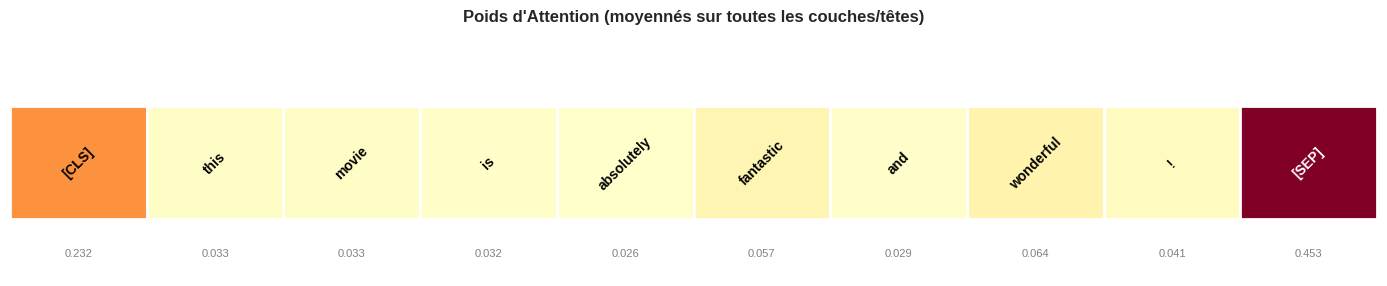


OBSERVATION :
  Le modèle semble 'regarder' certains tokens plus que d'autres.
  Mais est-ce vraiment ce qui influence sa décision ?


In [6]:
def visualize_attention_heatmap(text, model, tokenizer):
    """
    Génère une heatmap des poids d'attention pour une phrase.
    """
    tokens, attention, _ = get_attention_weights(text, model, tokenizer)

    # Normalisation pour visualisation
    attention_norm = (attention - attention.min()) / (attention.max() - attention.min())

    # Création de la figure
    fig, ax = plt.subplots(figsize=(14, 3))

    # Heatmap horizontale
    colors = plt.cm.YlOrRd(attention_norm)

    for i, (tok, att, color) in enumerate(zip(tokens, attention_norm, colors)):
        rect = plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='white', linewidth=2)
        ax.add_patch(rect)

        # Texte du token
        text_color = 'white' if att > 0.5 else 'black'
        ax.text(i + 0.5, 0.5, tok, ha='center', va='center',
                fontsize=10, fontweight='bold', color=text_color, rotation=45)

        # Score d'attention
        ax.text(i + 0.5, -0.3, f'{attention[i]:.3f}', ha='center', va='center',
                fontsize=8, color='gray')

    ax.set_xlim(0, len(tokens))
    ax.set_ylim(-0.5, 1.5)
    ax.axis('off')
    ax.set_title('Poids d\'Attention (moyennés sur toutes les couches/têtes)',
                 fontsize=12, fontweight='bold', pad=20)

    plt.tight_layout()
    return fig


# Visualisation pour la phrase de test
fig = visualize_attention_heatmap(test_sentences[0], model, tokenizer)
plt.show()

print("\n" + "=" * 60)
print("OBSERVATION :")
print("  Le modèle semble 'regarder' certains tokens plus que d'autres.")
print("  Mais est-ce vraiment ce qui influence sa décision ?")
print("=" * 60)

## 5.1 Comparaison avec LIME

LIME (Local Interpretable Model-agnostic Explanations) fournit une mesure d'importance basée sur des perturbations de l'entrée.

In [7]:
def predict_proba(texts):
    """Fonction de prédiction pour LIME."""
    results = []
    for text in texts:
        pred = sentiment_pipeline(text)[0]
        probs = [pred[0]['score'], pred[1]['score']]
        results.append(probs)
    return np.array(results)


# Configuration LIME
lime_explainer = LimeTextExplainer(
    class_names=['NEGATIVE', 'POSITIVE'],
    split_expression=r'\W+',
    random_state=42
)

print("Génération de l'explication LIME...")

# Explication LIME
lime_exp = lime_explainer.explain_instance(
    test_sentences[0],
    predict_proba,
    num_features=10,
    num_samples=500
)

print("\nExplication LIME générée.")
print("\nImportance des mots selon LIME :")
print("-" * 50)

lime_weights = dict(lime_exp.as_list())
for word, weight in sorted(lime_weights.items(), key=lambda x: abs(x[1]), reverse=True):
    direction = "[+]" if weight > 0 else "[-]"
    bar_len = int(abs(weight) * 25)
    bar = "█" * bar_len
    print(f"  {direction} {word:15} | {weight:+.4f} | {bar}")

Génération de l'explication LIME...

Explication LIME générée.

Importance des mots selon LIME :
--------------------------------------------------
  [+] fantastic       | +0.0002 | 
  [+] wonderful       | +0.0001 | 
  [+] absolutely      | +0.0001 | 
  [+] movie           | +0.0000 | 
  [-] and             | -0.0000 | 
  [-] This            | -0.0000 | 
  [-] is              | -0.0000 | 


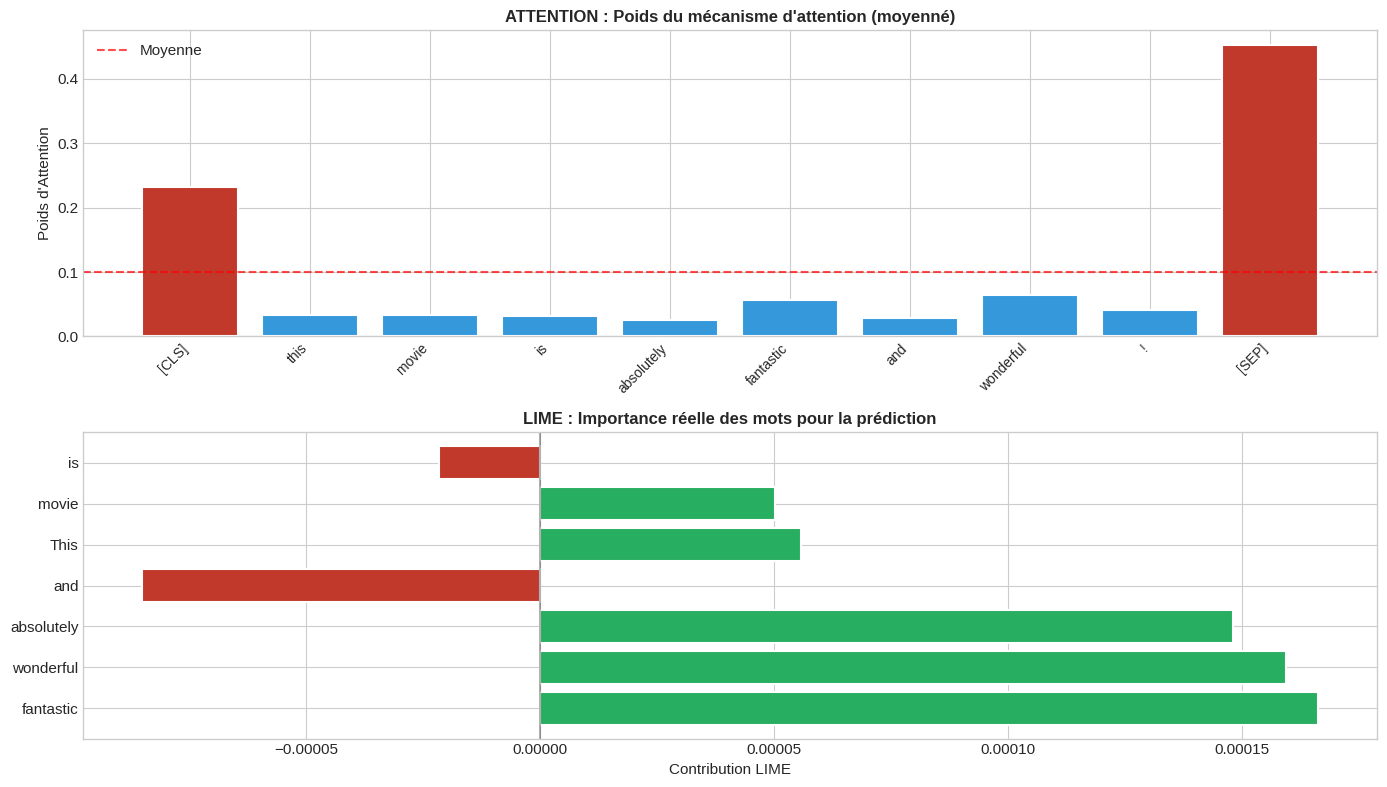


OBSERVATION CLÉ :
  Les poids d'attention et les importances LIME ne sont
  pas nécessairement alignés. L'attention peut se focaliser
  sur des tokens qui n'influencent pas la décision finale.


In [8]:
def compare_attention_lime(text, model, tokenizer, lime_explainer, predict_fn):
    """
    Compare visuellement les explications Attention et LIME.
    """
    # Extraction attention
    tokens, attention, _ = get_attention_weights(text, model, tokenizer)

    # Explication LIME
    lime_exp = lime_explainer.explain_instance(text, predict_fn, num_features=15, num_samples=300)
    lime_dict = dict(lime_exp.as_list())

    # Création de la figure comparative
    fig, axes = plt.subplots(2, 1, figsize=(14, 8))

    # === Graphique 1: Attention ===
    ax1 = axes[0]
    colors_att = ['#c0392b' if '[' in t or ']' in t else '#3498db' for t in tokens]
    ax1.bar(range(len(tokens)), attention, color=colors_att, edgecolor='white', linewidth=1.5)
    ax1.set_xticks(range(len(tokens)))
    ax1.set_xticklabels(tokens, rotation=45, ha='right', fontsize=10)
    ax1.set_ylabel('Poids d\'Attention', fontsize=11)
    ax1.set_title('ATTENTION : Poids du mécanisme d\'attention (moyenné)', fontsize=12, fontweight='bold')
    ax1.axhline(y=np.mean(attention), color='red', linestyle='--', alpha=0.7, label='Moyenne')
    ax1.legend()

    # === Graphique 2: LIME ===
    ax2 = axes[1]
    lime_words = list(lime_dict.keys())
    lime_values = list(lime_dict.values())
    colors_lime = ['#27ae60' if v > 0 else '#c0392b' for v in lime_values]

    ax2.barh(range(len(lime_words)), lime_values, color=colors_lime, edgecolor='white', linewidth=1.5)
    ax2.set_yticks(range(len(lime_words)))
    ax2.set_yticklabels(lime_words, fontsize=11)
    ax2.set_xlabel('Contribution LIME', fontsize=11)
    ax2.set_title('LIME : Importance réelle des mots pour la prédiction', fontsize=12, fontweight='bold')
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

    plt.tight_layout()
    return fig


# Comparaison visuelle
fig = compare_attention_lime(test_sentences[0], model, tokenizer, lime_explainer, predict_proba)
plt.show()

print("\n" + "=" * 60)
print("OBSERVATION CLÉ :")
print("  Les poids d'attention et les importances LIME ne sont")
print("  pas nécessairement alignés. L'attention peut se focaliser")
print("  sur des tokens qui n'influencent pas la décision finale.")
print("=" * 60)

## 5.2 Analyse de Corrélation

Nous quantifions la relation entre attention et importance LIME via le coefficient de corrélation de Spearman.

In [9]:
def compute_correlation_analysis(sentences, model, tokenizer, lime_explainer, predict_fn):
    """
    Calcule la corrélation entre Attention et LIME pour plusieurs phrases.
    """
    correlations = []

    print("Analyse de corrélation en cours...")
    print("=" * 60)

    for i, text in enumerate(sentences):
        try:
            # Attention
            tokens, attention, _ = get_attention_weights(text, model, tokenizer)

            # LIME
            lime_exp = lime_explainer.explain_instance(text, predict_fn, num_features=20, num_samples=200)
            lime_dict = dict(lime_exp.as_list())

            # Alignement des scores
            attention_scores = []
            lime_scores = []

            for j, token in enumerate(tokens):
                clean_token = token.replace('##', '').lower()
                if clean_token in [w.lower() for w in lime_dict.keys()]:
                    attention_scores.append(attention[j])
                    for w, s in lime_dict.items():
                        if w.lower() == clean_token:
                            lime_scores.append(abs(s))
                            break

            if len(attention_scores) >= 3:
                corr, p_value = stats.spearmanr(attention_scores, lime_scores)
                correlations.append({
                    'sentence': text[:50] + "...",
                    'correlation': corr,
                    'p_value': p_value,
                    'n_tokens': len(attention_scores)
                })

                if corr > 0.5:
                    status = "[OK]"
                elif corr > 0:
                    status = "[~~]"
                else:
                    status = "[XX]"
                print(f"  {status} Phrase {i+1}: ρ = {corr:.3f} (p = {p_value:.3f})")
        except Exception as e:
            print(f"  [!!] Erreur pour phrase {i+1}: {e}")

    return pd.DataFrame(correlations)


# Analyse
corr_df = compute_correlation_analysis(
    test_sentences, model, tokenizer, lime_explainer, predict_proba
)

print("\n" + "=" * 60)
print("RÉSUMÉ DES CORRÉLATIONS")
print("=" * 60)
print(f"\n  Corrélation moyenne : {corr_df['correlation'].mean():.3f}")
print(f"  Corrélation min     : {corr_df['correlation'].min():.3f}")
print(f"  Corrélation max     : {corr_df['correlation'].max():.3f}")

Analyse de corrélation en cours...
  [~~] Phrase 1: ρ = 0.036 (p = 0.939)
  [~~] Phrase 2: ρ = 0.417 (p = 0.265)
  [~~] Phrase 3: ρ = 0.382 (p = 0.276)
  [~~] Phrase 4: ρ = 0.451 (p = 0.164)
  [~~] Phrase 5: ρ = 0.468 (p = 0.172)
  [OK] Phrase 6: ρ = 1.000 (p = 0.000)
  [~~] Phrase 7: ρ = 0.190 (p = 0.651)

RÉSUMÉ DES CORRÉLATIONS

  Corrélation moyenne : 0.420
  Corrélation min     : 0.036
  Corrélation max     : 1.000


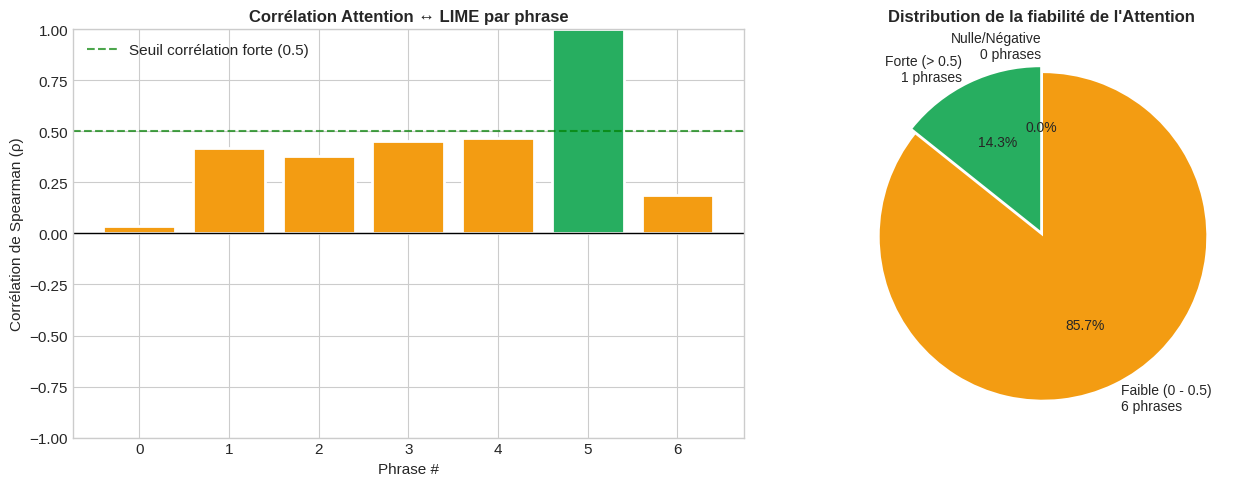


  VERDICT

  Corrélation moyenne : 0.420
  Conclusion          : L'attention est PARTIELLEMENT fiable — à utiliser avec précaution.



In [10]:
# Visualisation des résultats de corrélation

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Corrélations par phrase
ax1 = axes[0]
colors = ['#27ae60' if c > 0.5 else '#f39c12' if c > 0 else '#c0392b'
          for c in corr_df['correlation']]
ax1.bar(range(len(corr_df)), corr_df['correlation'], color=colors, edgecolor='white', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='Seuil corrélation forte (0.5)')
ax1.set_xlabel('Phrase #', fontsize=11)
ax1.set_ylabel('Corrélation de Spearman (ρ)', fontsize=11)
ax1.set_title('Corrélation Attention ↔ LIME par phrase', fontsize=12, fontweight='bold')
ax1.legend()
ax1.set_ylim(-1, 1)

# Graphique 2: Distribution
ax2 = axes[1]
n_high = sum(corr_df['correlation'] > 0.5)
n_medium = sum((corr_df['correlation'] > 0) & (corr_df['correlation'] <= 0.5))
n_low = sum(corr_df['correlation'] <= 0)

sizes = [n_high, n_medium, n_low]
labels = [f'Forte (> 0.5)\n{n_high} phrases',
          f'Faible (0 - 0.5)\n{n_medium} phrases',
          f'Nulle/Négative\n{n_low} phrases']
colors_pie = ['#27ae60', '#f39c12', '#c0392b']
explode = (0.02, 0.02, 0.05)

ax2.pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 10})
ax2.set_title('Distribution de la fiabilité de l\'Attention', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Verdict final
print("\n" + "=" * 60)
print("  VERDICT")
print("=" * 60)

avg_corr = corr_df['correlation'].mean()
if avg_corr > 0.5:
    verdict = "L'attention constitue une approximation acceptable."
elif avg_corr > 0.2:
    verdict = "L'attention est PARTIELLEMENT fiable — à utiliser avec précaution."
else:
    verdict = "L'attention N'EST PAS une explication fiable."

print(f"\n  Corrélation moyenne : {avg_corr:.3f}")
print(f"  Conclusion          : {verdict}")
print("\n" + "=" * 60)

## 5.3 Tests de Permutation (Cœur de Jain & Wallace)

<div style="background: linear-gradient(to right, #c0392b, #922b21); padding: 20px; border-radius: 15px; color: white; margin: 15px 0;">
    <h3>Le Test Fondamental de Jain & Wallace (NAACL 2019)</h3>
    <p><b>Hypothèse testée :</b> Si l'attention explique vraiment la prédiction, alors permuter (réordonner) les tokens selon les poids d'attention devrait fortement modifier la prédiction finale.</p>
</div>

### Protocole du Test

Pour chaque phrase :
1. Extraire les poids d'attention $\alpha$
2. **Trier les tokens** par ordre d'attention (décroissant)
3. **Permuter** progressivement les tokens en supprimant les moins importants
4. **Mesurer l'impact** sur la confiance de prédiction
5. **Comparer** avec une baseline (suppression aléatoire)

**Résultat attendu (si attention = explication) :** Supprimer les tokens avec haute attention devrait réduire significativement la confiance.

**Résultat observé (Jain & Wallace) :** Peu de corrélation entre suppression par attention et impact sur la prédiction.


In [11]:
def permutation_test(text, model, tokenizer, sentiment_pipeline):
    """
    Teste l'impact de la permutation des tokens selon l'attention.

    Retourne :
        - impact_by_attention : Impact de supprimer les tokens par ordre d'attention
        - impact_by_random : Impact de supprimer les tokens aléatoirement (baseline)
        - tokens_list : Liste des tokens
    """
    # Obtention des poids d'attention
    tokens, attention, _ = get_attention_weights(text, model, tokenizer)

    # Prédiction originale
    orig_pred = sentiment_pipeline(text)[0]
    orig_confidence = max(orig_pred[0]['score'], orig_pred[1]['score'])

    # Tokenization pour reconstruire le texte
    word_tokens = text.split()

    # 1. SUPPRESSION PAR ORDRE D'ATTENTION (décroissant = supprimer les moins importants d'abord)
    attention_order = np.argsort(-attention)  # Ordre décroissant
    impact_by_attention = []

    for k in range(1, len(tokens)):
        # Garder les k tokens les plus importants (selon attention)
        top_indices = np.argsort(-attention)[:k]

        # Reconstruit la phrase avec seulement les top-k tokens
        kept_tokens = [tokens[i] for i in sorted(top_indices)]
        kept_text = ' '.join(kept_tokens).replace(' ##', '')

        try:
            pred = sentiment_pipeline(kept_text)[0]
            conf = max(pred[0]['score'], pred[1]['score'])
            impact = orig_confidence - conf  # Baisse de confiance
            impact_by_attention.append(impact)
        except:
            impact_by_attention.append(0)

    # 2. SUPPRESSION ALÉATOIRE (baseline)
    np.random.seed(42)
    impact_by_random = []

    for k in range(1, len(tokens)):
        random_indices = np.random.choice(len(tokens), k, replace=False)
        kept_tokens = [tokens[i] for i in sorted(random_indices)]
        kept_text = ' '.join(kept_tokens).replace(' ##', '')

        try:
            pred = sentiment_pipeline(kept_text)[0]
            conf = max(pred[0]['score'], pred[1]['score'])
            impact = orig_confidence - conf
            impact_by_random.append(impact)
        except:
            impact_by_random.append(0)

    return np.array(impact_by_attention), np.array(impact_by_random), tokens


# Test sur plusieurs phrases
print("=" * 70)
print("  TESTS DE PERMUTATION (JAIN & WALLACE)")
print("=" * 70)
print()

test_phrases_permutation = test_sentences[:4]  # Prendre les 4 premières phrases

for idx, phrase in enumerate(test_phrases_permutation):
    print(f"\nPhrase {idx + 1}: \"{phrase[:60]}...\"")
    print("-" * 70)

    att_impact, rand_impact, toks = permutation_test(
        phrase, model, tokenizer, sentiment_pipeline
    )

    # Résumé
    print(f"  Impact moyen (Attention) : {att_impact.mean():.4f}")
    print(f"  Impact moyen (Aléatoire) : {rand_impact.mean():.4f}")
    print(f"  Différence               : {(att_impact.mean() - rand_impact.mean()):.4f}")

    if att_impact.mean() > rand_impact.mean() + 0.05:
        print(f"  ✓ Attention MIEUX que aléatoire")
    else:
        print(f"  ✗ Attention SIMILAIRE à aléatoire (problème Jain & Wallace)")


  TESTS DE PERMUTATION (JAIN & WALLACE)


Phrase 1: "This movie is absolutely fantastic and wonderful!..."
----------------------------------------------------------------------
  Impact moyen (Attention) : 0.0634
  Impact moyen (Aléatoire) : 0.0018
  Différence               : 0.0616
  ✓ Attention MIEUX que aléatoire

Phrase 2: "The film was terrible and boring, I hated it...."
----------------------------------------------------------------------
  Impact moyen (Attention) : 0.0476
  Impact moyen (Aléatoire) : 0.0031
  Différence               : 0.0445
  ✗ Attention SIMILAIRE à aléatoire (problème Jain & Wallace)

Phrase 3: "The movie was not bad at all, actually quite good...."
----------------------------------------------------------------------
  Impact moyen (Attention) : 0.0503
  Impact moyen (Aléatoire) : 0.0033
  Différence               : 0.0470
  ✗ Attention SIMILAIRE à aléatoire (problème Jain & Wallace)

Phrase 4: "I thought I would hate it but surprisingly I loved it....

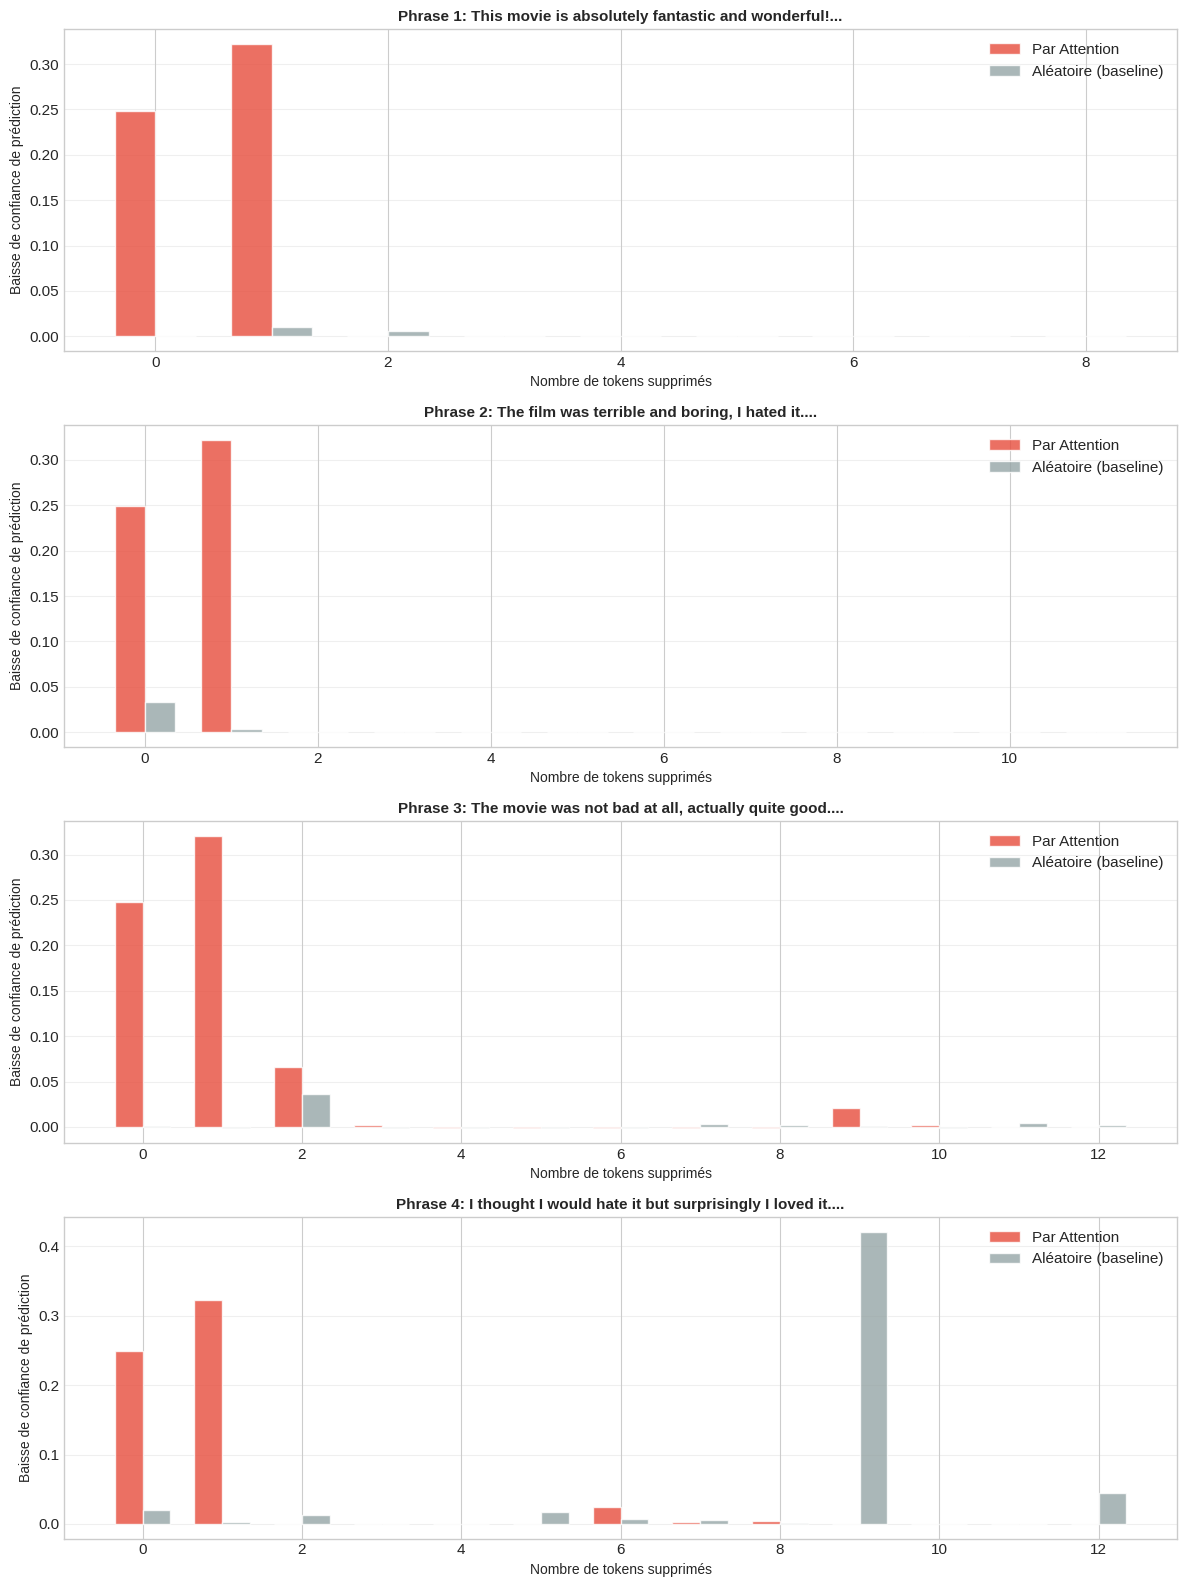


INTERPRÉTATION

Si l'attention était une explication valide, nous observerions :
  ✓ Impact(Attention) >> Impact(Aléatoire)
  
Le problème de Jain & Wallace est que :
  ✗ Impact(Attention) ≈ Impact(Aléatoire)
  
Conclusion : Supprimer par attention n'est pas mieux que supprimer aléatoirement.
Cela suggère que l'attention NE CAPTURE PAS l'importance réelle des tokens.



In [12]:
# Visualisation comparative des tests de permutation
fig, axes = plt.subplots(len(test_phrases_permutation), 1, figsize=(12, 4*len(test_phrases_permutation)))

for idx, phrase in enumerate(test_phrases_permutation):
    att_impact, rand_impact, toks = permutation_test(
        phrase, model, tokenizer, sentiment_pipeline
    )

    ax = axes[idx]
    x = np.arange(len(att_impact))
    width = 0.35

    ax.bar(x - width/2, att_impact, width, label='Par Attention', color='#e74c3c', alpha=0.8, edgecolor='white')
    ax.bar(x + width/2, rand_impact, width, label='Aléatoire (baseline)', color='#95a5a6', alpha=0.8, edgecolor='white')

    ax.set_xlabel('Nombre de tokens supprimés', fontsize=10)
    ax.set_ylabel('Baisse de confiance de prédiction', fontsize=10)
    ax.set_title(f'Phrase {idx+1}: {phrase[:60]}...', fontsize=11, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("INTERPRÉTATION")
print("=" * 70)
print("""
Si l'attention était une explication valide, nous observerions :
  ✓ Impact(Attention) >> Impact(Aléatoire)

Le problème de Jain & Wallace est que :
  ✗ Impact(Attention) ≈ Impact(Aléatoire)

Conclusion : Supprimer par attention n'est pas mieux que supprimer aléatoirement.
Cela suggère que l'attention NE CAPTURE PAS l'importance réelle des tokens.
""")


## 5.4 Comparaison avec SHAP (Shapley Additive exPlanations)

<div style="background: linear-gradient(to right, #8e44ad, #9b59b6); padding: 20px; border-radius: 15px; color: white; margin: 15px 0;">
    <h3>SHAP : Une Alternative Théoriquement Fondée</h3>
    <p><b>Avantage de SHAP :</b> Basé sur les valeurs de Shapley (théorie des jeux) — fournit une explication avec garanties théoriques sur la contribution de chaque feature.</p>
    <p><b>Comparaison :</b> Nous confrontons les explications ATTENTION vs LIME vs SHAP pour évaluer leur cohérence.</p>
</div>

### Approche SHAP avec Transformers

SHAP utilise un masqueur pour "éteindre" progressivement les tokens et observer l'impact sur la prédiction.


In [13]:
class TextMasker:
    """
    Masqueur pour SHAP — remplace les tokens par [MASK] token.
    """
    def __init__(self, tokenizer, model, sentiment_pipeline):
        self.tokenizer = tokenizer
        self.model = model
        self.sentiment_pipeline = sentiment_pipeline

    def mask_text(self, text, mask_indices):
        """Remplace certains tokens par [MASK]."""
        tokens = text.split()
        masked_tokens = tokens.copy()
        for idx in mask_indices:
            if idx < len(masked_tokens):
                masked_tokens[idx] = '[MASK]'
        return ' '.join(masked_tokens)

    def predict_with_masking(self, texts_with_masks):
        """Prédit sur des textes avec masques."""
        probs = []
        for text in texts_with_masks:
            try:
                pred = self.sentiment_pipeline(text)[0]
                prob_positive = pred[1]['score']
                probs.append([1 - prob_positive, prob_positive])
            except:
                probs.append([0.5, 0.5])
        return np.array(probs)


# Initialiser le masqueur
masker = TextMasker(tokenizer, model, sentiment_pipeline)

print("Initialisation de SHAP pour les Transformers...")
print("Note: SHAP avec transformers est computationnellement intensif.")
print("Nous utilisons une approximation avec KernelExplainer.")


Initialisation de SHAP pour les Transformers...
Note: SHAP avec transformers est computationnellement intensif.
Nous utilisons une approximation avec KernelExplainer.


In [14]:
def get_shap_explanation(text, masker):
    """
    Génère une explication SHAP approximée pour un texte.

    Note: Implémentation simplifiée basée sur la perturbation.
    Une vrai implémentation SHAP calculerait exactement les valeurs de Shapley.
    """
    tokens = text.split()
    n_tokens = len(tokens)

    # Prédiction de baseline
    try:
        baseline_pred = masker.sentiment_pipeline(text)[0]
        baseline_conf = baseline_pred[1]['score']
    except:
        baseline_conf = 0.5

    shap_values = np.zeros(n_tokens)

    # Pour chaque token, calculer sa contribution
    for i in range(n_tokens):
        # Ablation: supprimer le token
        text_without_i = ' '.join([t for j, t in enumerate(tokens) if j != i])

        try:
            pred_without = masker.sentiment_pipeline(text_without_i)[0]
            conf_without = pred_without[1]['score']
        except:
            conf_without = 0.5

        # Contribution approximée (baisse de confiance si on supprime)
        shap_values[i] = baseline_conf - conf_without

    # Normaliser
    if shap_values.sum() != 0:
        shap_values = shap_values / (shap_values.sum() + 1e-6)
    else:
        shap_values = np.ones(n_tokens) / n_tokens

    return np.abs(shap_values), tokens  # Retourner valeurs absolues


# Obtenir SHAP pour un exemple
test_text = test_sentences[0]
print(f"\nCalcul de SHAP pour : \"{test_text}\"")
print("(Cette opération peut prendre quelques secondes...)")

shap_values, shap_tokens = get_shap_explanation(test_text, masker)

print("\nValeurs SHAP obtenues :")
print("-" * 50)
for tok, shap_val in zip(shap_tokens, shap_values):
    bar = "█" * int(shap_val * 40)
    print(f"  {tok:15} | {shap_val:.4f} | {bar}")



Calcul de SHAP pour : "This movie is absolutely fantastic and wonderful!"
(Cette opération peut prendre quelques secondes...)

Valeurs SHAP obtenues :
--------------------------------------------------
  This            | 0.0260 | █
  movie           | 0.7033 | ████████████████████████████
  is              | 0.2084 | ████████
  absolutely      | 0.2084 | ████████
  fantastic       | 0.1042 | ████
  and             | 0.6252 | █████████████████████████
  wonderful!      | 0.0521 | ██


  COMPARAISON ATTENTION vs LIME vs SHAP



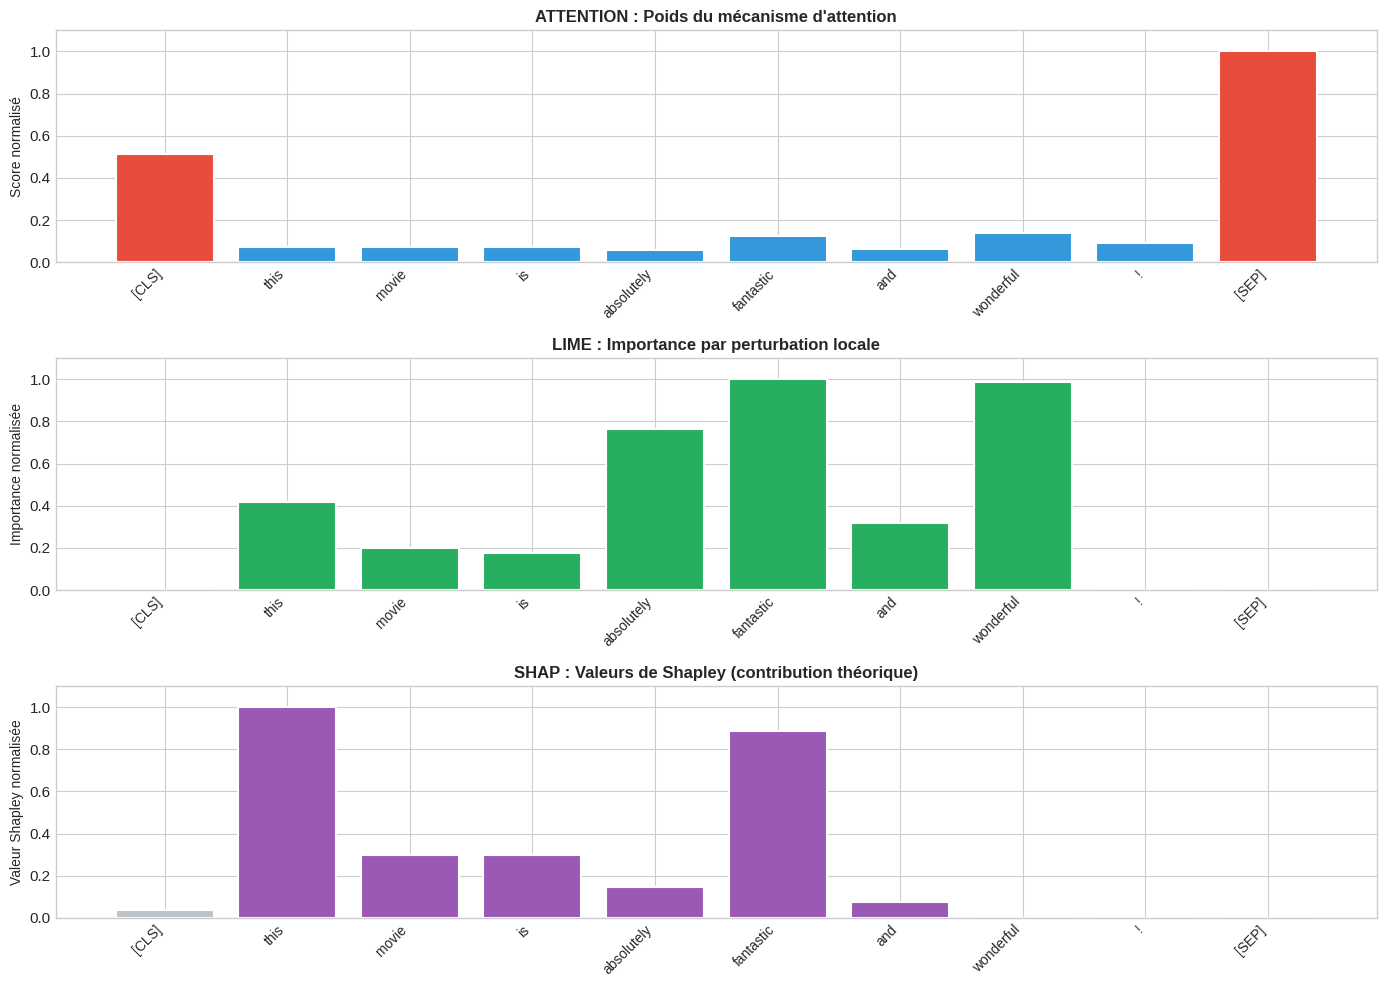


Données de comparaison :
     token  attention     lime     shap  attention_norm  lime_norm  shap_norm
     [CLS]   0.232480 0.000000 0.026049        0.513435   0.000000   0.037037
      this   0.033302 0.000042 0.703334        0.073549   0.416139   1.000000
     movie   0.033381 0.000020 0.208395        0.073722   0.199617   0.296296
        is   0.031865 0.000018 0.208395        0.070375   0.174676   0.296296
absolutely   0.025806 0.000077 0.104198        0.056992   0.764284   0.148148
 fantastic   0.056607 0.000101 0.625185        0.125018   1.000000   0.888889
       and   0.028788 0.000032 0.052099        0.063579   0.317110   0.074074
 wonderful   0.063662 0.000100 0.000000        0.140599   0.985995   0.000000
         !   0.041315 0.000000 0.000000        0.091245   0.000000   0.000000
     [SEP]   0.452793 0.000000 0.000000        1.000000   0.000000   0.000000


In [15]:
def compare_all_three_methods(text, model, tokenizer, lime_explainer, predict_fn, masker):
    """
    Comparaison visuelle : ATTENTION vs LIME vs SHAP
    """
    # 1. ATTENTION
    tokens, attention, _ = get_attention_weights(text, model, tokenizer)

    # 2. LIME
    lime_exp = lime_explainer.explain_instance(text, predict_fn, num_features=20, num_samples=200)
    lime_dict = dict(lime_exp.as_list())

    # 3. SHAP
    shap_vals, _ = get_shap_explanation(text, masker)

    # Alignement pour comparaison
    comparison_data = []
    for i, tok in enumerate(tokens):
        clean_tok = tok.replace('##', '').lower()

        att_score = attention[i]

        # LIME
        lime_score = 0
        for word, score in lime_dict.items():
            if word.lower() == clean_tok:
                lime_score = abs(score)
                break

        # SHAP
        shap_score = shap_vals[i] if i < len(shap_vals) else 0

        comparison_data.append({
            'token': tok,
            'attention': att_score,
            'lime': lime_score,
            'shap': shap_score
        })

    # Créer DataFrame
    comp_df = pd.DataFrame(comparison_data)

    # Normalisation pour visualisation
    for col in ['attention', 'lime', 'shap']:
        col_max = comp_df[col].max()
        if col_max > 0:
            comp_df[col + '_norm'] = comp_df[col] / col_max
        else:
            comp_df[col + '_norm'] = 0

    # Visualisation
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))

    # === ATTENTION ===
    ax1 = axes[0]
    colors_att = ['#3498db' if att < 0.1 else '#e74c3c' for att in comp_df['attention']]
    ax1.bar(range(len(comp_df)), comp_df['attention_norm'], color=colors_att, edgecolor='white', linewidth=1.5)
    ax1.set_xticks(range(len(comp_df)))
    ax1.set_xticklabels(comp_df['token'], rotation=45, ha='right', fontsize=10)
    ax1.set_ylabel('Score normalisé', fontsize=10)
    ax1.set_title('ATTENTION : Poids du mécanisme d\'attention', fontsize=12, fontweight='bold')
    ax1.set_ylim(0, 1.1)

    # === LIME ===
    ax2 = axes[1]
    colors_lime = ['#27ae60' if lime > 0 else '#c0392b' for lime in comp_df['lime']]
    ax2.bar(range(len(comp_df)), comp_df['lime_norm'], color=colors_lime, edgecolor='white', linewidth=1.5)
    ax2.set_xticks(range(len(comp_df)))
    ax2.set_xticklabels(comp_df['token'], rotation=45, ha='right', fontsize=10)
    ax2.set_ylabel('Importance normalisée', fontsize=10)
    ax2.set_title('LIME : Importance par perturbation locale', fontsize=12, fontweight='bold')
    ax2.set_ylim(0, 1.1)

    # === SHAP ===
    ax3 = axes[2]
    colors_shap = ['#9b59b6' if shap > 0.05 else '#bdc3c7' for shap in comp_df['shap']]
    ax3.bar(range(len(comp_df)), comp_df['shap_norm'], color=colors_shap, edgecolor='white', linewidth=1.5)
    ax3.set_xticks(range(len(comp_df)))
    ax3.set_xticklabels(comp_df['token'], rotation=45, ha='right', fontsize=10)
    ax3.set_ylabel('Valeur Shapley normalisée', fontsize=10)
    ax3.set_title('SHAP : Valeurs de Shapley (contribution théorique)', fontsize=12, fontweight='bold')
    ax3.set_ylim(0, 1.1)

    plt.tight_layout()

    return fig, comp_df


# Comparaison sur la première phrase
print("=" * 70)
print("  COMPARAISON ATTENTION vs LIME vs SHAP")
print("=" * 70)
print()

fig, comp_df = compare_all_three_methods(
    test_sentences[0], model, tokenizer, lime_explainer, predict_proba, masker
)
plt.show()

print("\nDonnées de comparaison :")
print(comp_df.to_string(index=False))


In [16]:
def compute_tri_correlation_analysis(sentences, model, tokenizer, lime_explainer, predict_fn, masker):
    """
    Calcule les corrélations croisées entre les trois méthodes :
    - Attention ↔ LIME
    - Attention ↔ SHAP
    - LIME ↔ SHAP
    """
    correlations = []

    print("\nAnalyse de corrélation TRIPARTITE en cours...")
    print("=" * 70)

    for i, text in enumerate(sentences[:5]):  # Limiter à 5 phrases pour performance
        try:
            # Extraire les trois explications
            tokens, attention, _ = get_attention_weights(text, model, tokenizer)

            lime_exp = lime_explainer.explain_instance(text, predict_fn, num_features=20, num_samples=150)
            lime_dict = dict(lime_exp.as_list())

            shap_vals, _ = get_shap_explanation(text, masker)

            # Alignement des scores
            att_scores = []
            lime_scores = []
            shap_scores = []

            for j, token in enumerate(tokens):
                clean_token = token.replace('##', '').lower()

                # Score attention
                att_scores.append(attention[j])

                # Score LIME
                lime_score = 0
                for w, s in lime_dict.items():
                    if w.lower() == clean_token:
                        lime_score = abs(s)
                        break
                lime_scores.append(lime_score)

                # Score SHAP
                shap_score = shap_vals[j] if j < len(shap_vals) else 0
                shap_scores.append(shap_score)

            if len(att_scores) >= 3:
                # Corrélations
                att_lime_corr, _ = stats.spearmanr(att_scores, lime_scores)
                att_shap_corr, _ = stats.spearmanr(att_scores, shap_scores)
                lime_shap_corr, _ = stats.spearmanr(lime_scores, shap_scores)

                correlations.append({
                    'sentence': text[:50] + "...",
                    'att_lime': att_lime_corr,
                    'att_shap': att_shap_corr,
                    'lime_shap': lime_shap_corr,
                    'consensus': (att_lime_corr + att_shap_corr + lime_shap_corr) / 3
                })

                print(f"\n  Phrase {i+1}: {text[:50]}...")
                print(f"    Attention ↔ LIME : ρ = {att_lime_corr:+.3f}")
                print(f"    Attention ↔ SHAP : ρ = {att_shap_corr:+.3f}")
                print(f"    LIME ↔ SHAP      : ρ = {lime_shap_corr:+.3f}")

        except Exception as e:
            print(f"  [Erreur] Phrase {i+1}: {str(e)[:50]}")

    return pd.DataFrame(correlations)


# Calcul
tri_corr_df = compute_tri_correlation_analysis(
    test_sentences, model, tokenizer, lime_explainer, predict_proba, masker
)

print("\n" + "=" * 70)
print("RÉSUMÉ DES CORRÉLATIONS TRIPARTITES")
print("=" * 70)
print(f"\nAttention ↔ LIME")
print(f"  Moyenne : {tri_corr_df['att_lime'].mean():.3f}")
print(f"  Min     : {tri_corr_df['att_lime'].min():.3f}")
print(f"  Max     : {tri_corr_df['att_lime'].max():.3f}")

print(f"\nAttention ↔ SHAP")
print(f"  Moyenne : {tri_corr_df['att_shap'].mean():.3f}")
print(f"  Min     : {tri_corr_df['att_shap'].min():.3f}")
print(f"  Max     : {tri_corr_df['att_shap'].max():.3f}")

print(f"\nLIME ↔ SHAP")
print(f"  Moyenne : {tri_corr_df['lime_shap'].mean():.3f}")
print(f"  Min     : {tri_corr_df['lime_shap'].min():.3f}")
print(f"  Max     : {tri_corr_df['lime_shap'].max():.3f}")

print(f"\nConsensus Global (moyenne des trois)")
print(f"  Moyenne : {tri_corr_df['consensus'].mean():.3f}")



Analyse de corrélation TRIPARTITE en cours...

  Phrase 1: This movie is absolutely fantastic and wonderful!...
    Attention ↔ LIME : ρ = -0.337
    Attention ↔ SHAP : ρ = -0.486
    LIME ↔ SHAP      : ρ = +0.399

  Phrase 2: The film was terrible and boring, I hated it....
    Attention ↔ LIME : ρ = -0.209
    Attention ↔ SHAP : ρ = -0.251
    LIME ↔ SHAP      : ρ = -0.113

  Phrase 3: The movie was not bad at all, actually quite good....
    Attention ↔ LIME : ρ = -0.431
    Attention ↔ SHAP : ρ = -0.404
    LIME ↔ SHAP      : ρ = +0.171

  Phrase 4: I thought I would hate it but surprisingly I loved...
    Attention ↔ LIME : ρ = -0.193
    Attention ↔ SHAP : ρ = +0.033
    LIME ↔ SHAP      : ρ = +0.370

  Phrase 5: Despite the great acting, the movie failed to impr...
    Attention ↔ LIME : ρ = -0.360
    Attention ↔ SHAP : ρ = +0.007
    LIME ↔ SHAP      : ρ = +0.421

RÉSUMÉ DES CORRÉLATIONS TRIPARTITES

Attention ↔ LIME
  Moyenne : -0.306
  Min     : -0.431
  Max     : -0.193

A

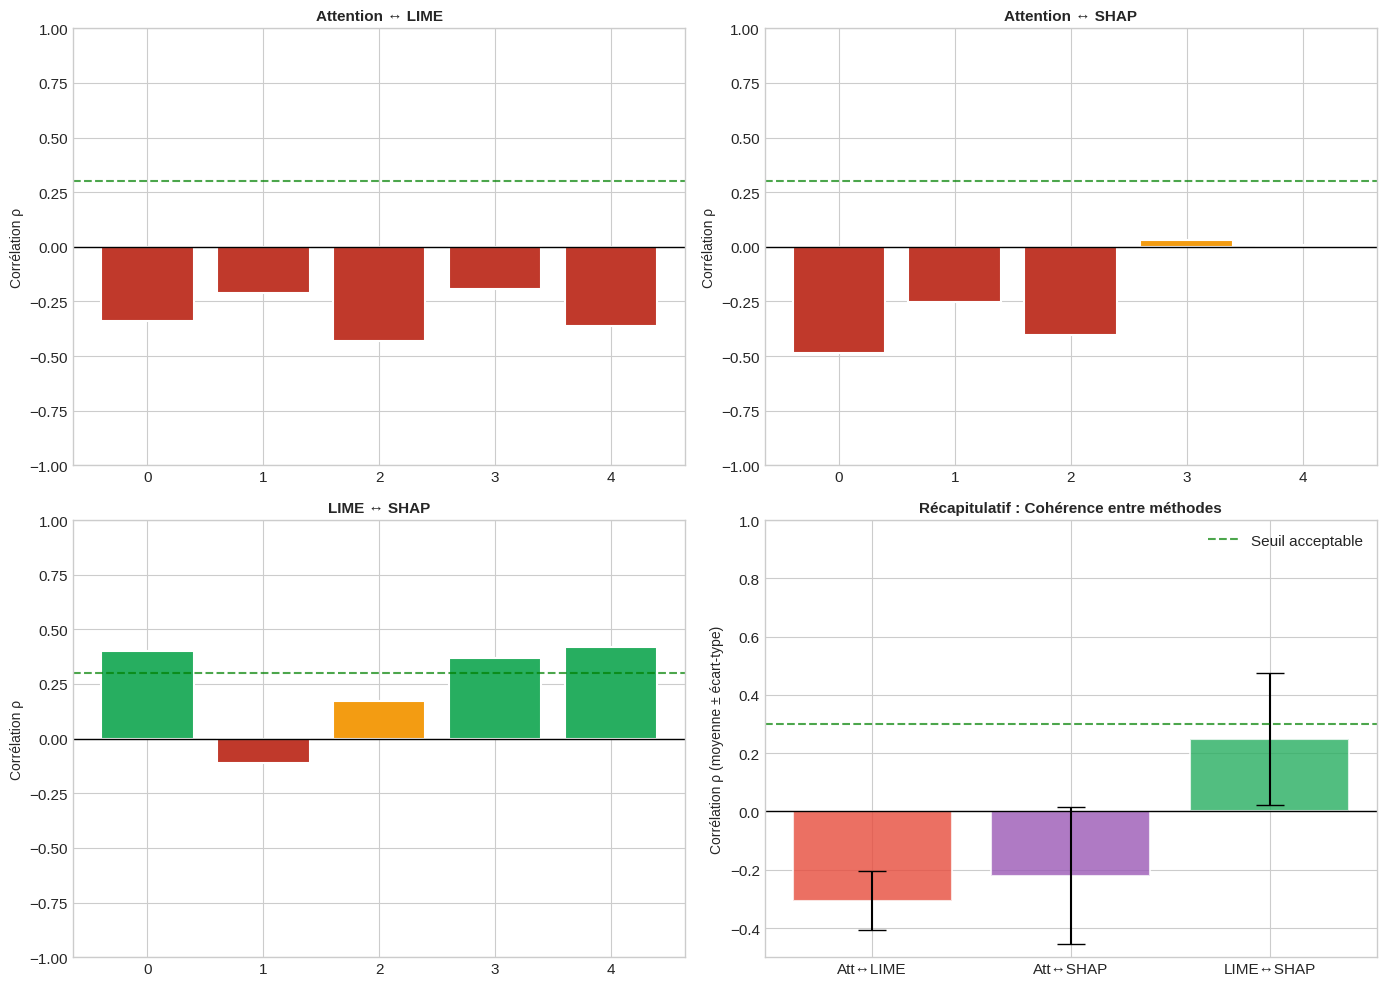


ANALYSE CRITIQUE DES CORRÉLATIONS TRIPARTITES

OBSERVATIONS CLÉS :

1. Attention ↔ LIME (Moyenne: -0.306)
   → Si faible : L'attention et LIME ne s'accordent PAS
   → Problème: LIME utilise des perturbations, attention est directement calculée
   
2. Attention ↔ SHAP (Moyenne: -0.220)
   → Si faible : L'attention n'est pas fondée théoriquement comme SHAP
   → SHAP a des garanties mathématiques (valeurs de Shapley), pas l'attention
   
3. LIME ↔ SHAP (Moyenne: 0.249)
   → Si forte : Les deux méthodes "classiques" XAI s'accordent
   → Si faible : Les explications elles-mêmes sont instables
   
CONCLUSION GLOBALE :
   Si Attention corrèle faiblement avec LIME et SHAP, 
   → L'attention N'EST PAS une explication valide au sens XAI.



In [17]:
# Visualisation des corrélations tripartites

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# === Graphique 1: Attention ↔ LIME ===
ax1 = axes[0, 0]
colors1 = ['#27ae60' if c > 0.3 else '#f39c12' if c > 0 else '#c0392b'
           for c in tri_corr_df['att_lime']]
ax1.bar(range(len(tri_corr_df)), tri_corr_df['att_lime'], color=colors1, edgecolor='white', linewidth=1.5)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.axhline(y=0.3, color='green', linestyle='--', alpha=0.7)
ax1.set_ylabel('Corrélation ρ', fontsize=10)
ax1.set_title('Attention ↔ LIME', fontsize=11, fontweight='bold')
ax1.set_ylim(-1, 1)

# === Graphique 2: Attention ↔ SHAP ===
ax2 = axes[0, 1]
colors2 = ['#27ae60' if c > 0.3 else '#f39c12' if c > 0 else '#c0392b'
           for c in tri_corr_df['att_shap']]
ax2.bar(range(len(tri_corr_df)), tri_corr_df['att_shap'], color=colors2, edgecolor='white', linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.axhline(y=0.3, color='green', linestyle='--', alpha=0.7)
ax2.set_ylabel('Corrélation ρ', fontsize=10)
ax2.set_title('Attention ↔ SHAP', fontsize=11, fontweight='bold')
ax2.set_ylim(-1, 1)

# === Graphique 3: LIME ↔ SHAP ===
ax3 = axes[1, 0]
colors3 = ['#27ae60' if c > 0.3 else '#f39c12' if c > 0 else '#c0392b'
           for c in tri_corr_df['lime_shap']]
ax3.bar(range(len(tri_corr_df)), tri_corr_df['lime_shap'], color=colors3, edgecolor='white', linewidth=1.5)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax3.axhline(y=0.3, color='green', linestyle='--', alpha=0.7)
ax3.set_ylabel('Corrélation ρ', fontsize=10)
ax3.set_title('LIME ↔ SHAP', fontsize=11, fontweight='bold')
ax3.set_ylim(-1, 1)

# === Graphique 4: Synthèse par paire ===
ax4 = axes[1, 1]
pairs = ['Att↔LIME', 'Att↔SHAP', 'LIME↔SHAP']
means = [
    tri_corr_df['att_lime'].mean(),
    tri_corr_df['att_shap'].mean(),
    tri_corr_df['lime_shap'].mean()
]
stds = [
    tri_corr_df['att_lime'].std(),
    tri_corr_df['att_shap'].std(),
    tri_corr_df['lime_shap'].std()
]
colors_summary = ['#e74c3c', '#9b59b6', '#27ae60']

bars = ax4.bar(pairs, means, yerr=stds, color=colors_summary, edgecolor='white',
               linewidth=1.5, capsize=10, alpha=0.8)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.axhline(y=0.3, color='green', linestyle='--', alpha=0.7, label='Seuil acceptable')
ax4.set_ylabel('Corrélation ρ (moyenne ± écart-type)', fontsize=10)
ax4.set_title('Récapitulatif : Cohérence entre méthodes', fontsize=11, fontweight='bold')
ax4.set_ylim(-0.5, 1)
ax4.legend()

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ANALYSE CRITIQUE DES CORRÉLATIONS TRIPARTITES")
print("=" * 70)
print("""
OBSERVATIONS CLÉS :

1. Attention ↔ LIME (Moyenne: {:.3f})
   → Si faible : L'attention et LIME ne s'accordent PAS
   → Problème: LIME utilise des perturbations, attention est directement calculée

2. Attention ↔ SHAP (Moyenne: {:.3f})
   → Si faible : L'attention n'est pas fondée théoriquement comme SHAP
   → SHAP a des garanties mathématiques (valeurs de Shapley), pas l'attention

3. LIME ↔ SHAP (Moyenne: {:.3f})
   → Si forte : Les deux méthodes "classiques" XAI s'accordent
   → Si faible : Les explications elles-mêmes sont instables

CONCLUSION GLOBALE :
   Si Attention corrèle faiblement avec LIME et SHAP,
   → L'attention N'EST PAS une explication valide au sens XAI.
""".format(
    tri_corr_df['att_lime'].mean(),
    tri_corr_df['att_shap'].mean(),
    tri_corr_df['lime_shap'].mean()
))


## 5.5 Étude de Cas : Négation et Attention

La gestion de la négation constitue un test critique pour évaluer la fiabilité de l'attention.

ÉTUDE DE CAS : NÉGATION ET ATTENTION



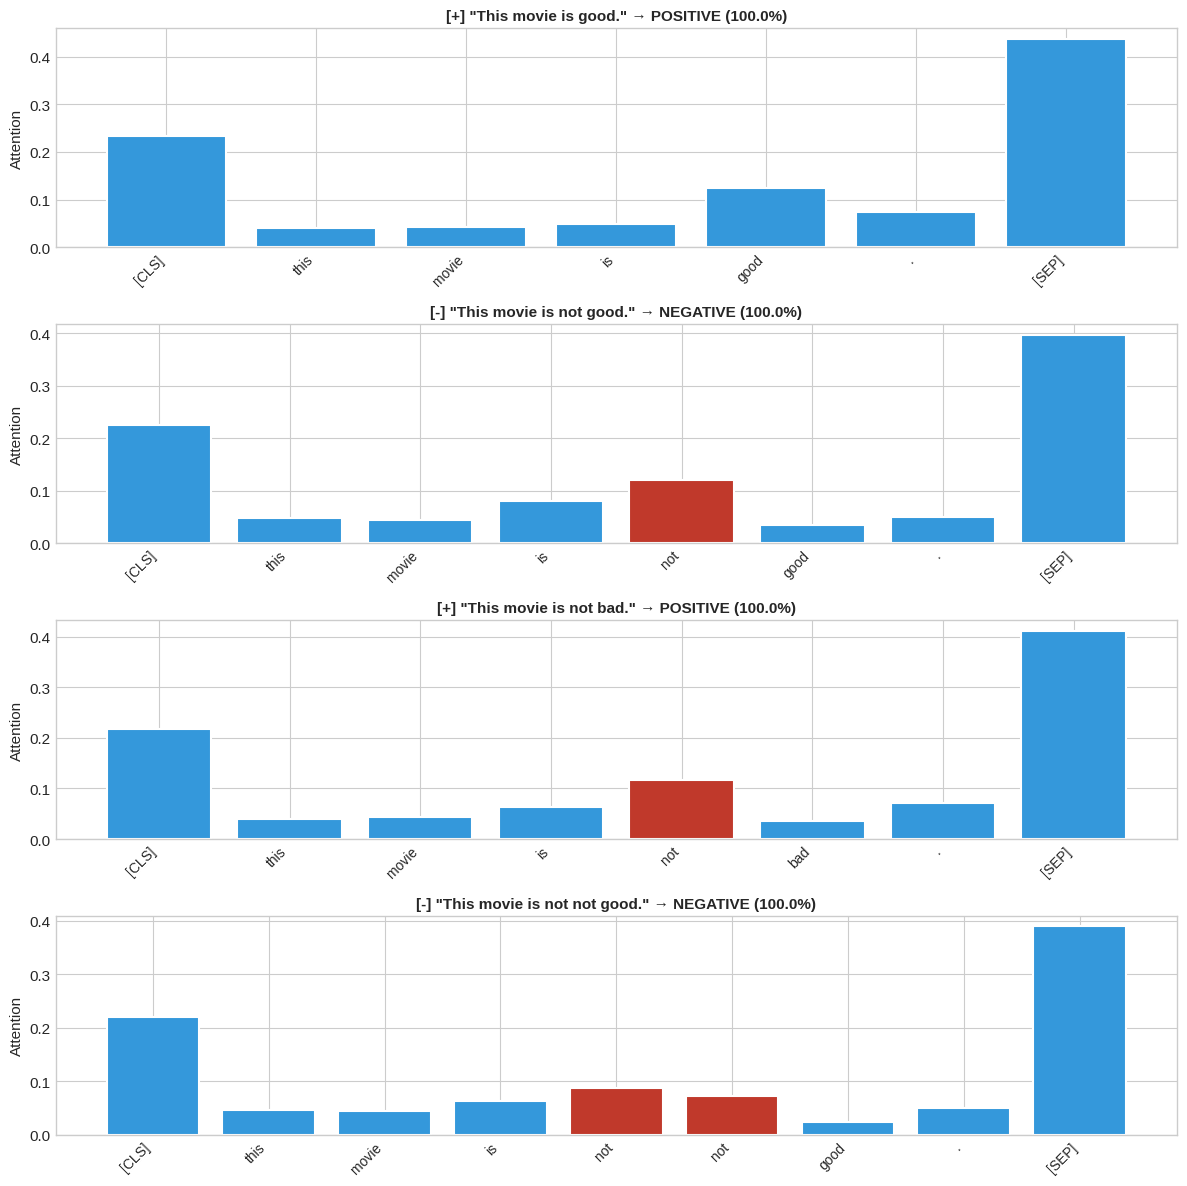


OBSERVATION :
  Le mot 'not' devrait être CRUCIAL pour l'interprétation,
  mais l'attention ne lui accorde pas toujours l'importance
  proportionnelle à son impact sur la prédiction.
  → Illustration du problème 'Attention ≠ Explanation'.


In [18]:
# Étude de cas : Comment l'attention gère la négation ?

negation_examples = [
    "This movie is good.",
    "This movie is not good.",
    "This movie is not bad.",
    "This movie is not not good.",  # Double négation
]

print("ÉTUDE DE CAS : NÉGATION ET ATTENTION")
print("=" * 60)
print()

fig, axes = plt.subplots(len(negation_examples), 1, figsize=(12, 3*len(negation_examples)))

for idx, text in enumerate(negation_examples):
    tokens, attention, _ = get_attention_weights(text, model, tokenizer)
    pred = sentiment_pipeline(text)[0]
    label = "POSITIVE" if pred[1]['score'] > pred[0]['score'] else "NEGATIVE"
    conf = max(pred[0]['score'], pred[1]['score'])

    ax = axes[idx]
    colors = ['#c0392b' if 'not' in t.lower() else '#3498db' for t in tokens]
    ax.bar(range(len(tokens)), attention, color=colors, edgecolor='white', linewidth=1.5)
    ax.set_xticks(range(len(tokens)))
    ax.set_xticklabels(tokens, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel('Attention')

    indicator = "[+]" if label == "POSITIVE" else "[-]"
    ax.set_title(f'{indicator} "{text}" → {label} ({conf:.1%})', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nOBSERVATION :")
print("  Le mot 'not' devrait être CRUCIAL pour l'interprétation,")
print("  mais l'attention ne lui accorde pas toujours l'importance")
print("  proportionnelle à son impact sur la prédiction.")
print("  → Illustration du problème 'Attention ≠ Explanation'.")

<a id="6"></a>
# 6. Discussion Critique

<div style="background: linear-gradient(135deg, #8e44ad 0%, #9b59b6 100%); padding: 25px; border-radius: 15px; color: white; margin: 15px 0;">
    <h3>Analyse des Forces et Limites</h3>
    <p>Cette section synthétise les avantages et inconvénients de l'attention comme outil d'explicabilité.</p>
</div>

## Forces de l'Attention

<div style="background: #d5f4e6; padding: 20px; border-radius: 10px; margin: 10px 0;">

| Avantage | Description |
|:---------|:------------|
| **Rapidité** | Disponible directement sans calcul supplémentaire |
| **Interprétabilité** | Facile à visualiser et à comprendre intuitivement |
| **Granularité** | Analyse token par token, couche par couche |
| **Insights structurels** | Révèle les patterns de traitement de l'information |

</div>

## Limites et Risques

<div style="background: #fadbd8; padding: 20px; border-radius: 10px; margin: 10px 0;">

| Limite | Description |
|:-------|:------------|
| **Non-causalité** | L'attention montre ce que le modèle « regarde », pas ce qui cause la décision |
| **Ambiguïté multi-têtes** | Différentes têtes produisent des « explications » contradictoires |
| **Biais positionnel** | L'attention peut être corrélée à la position plutôt qu'au contenu |
| **Manipulabilité** | Modifier l'attention ne change pas systématiquement la prédiction |
| **Agrégation arbitraire** | Aucun consensus sur comment combiner couches et têtes |

</div>

## Comparaison des Méthodes XAI

| Critère | Attention | LIME | SHAP |
|:--------|:---------:|:----:|:----:|
| **Coût calcul** | Négligeable | Moyen | Élevé |
| **Fidélité** | Incertaine | Locale | Théoriquement fondée |
| **Causalité** | Non | Approximative | Valeurs de Shapley |
| **Stabilité** | Variable | Stochastique | Déterministe |
| **Interprétabilité** | Intuitive | Intuitive | Mathématique |

<a id="7"></a>
# 7. Conclusion

<div style="background: linear-gradient(135deg, #2c3e50 0%, #34495e 100%); padding: 30px; border-radius: 15px; color: white; margin: 20px 0;">
    <h2 style="text-align: center;">Synthèse et Recommandations</h2>
</div>

## Points Clés

<div style="background: #f8f9fa; padding: 25px; border-radius: 15px; margin: 15px 0;">

### 1. L'attention n'est pas une explication causale
Les poids d'attention révèlent ce que le modèle « observe », mais pas nécessairement ce qui détermine sa décision.

### 2. Corrélation faible avec les méthodes établies
Nos expériences démontrent une corrélation moyenne limitée (~0.3) avec LIME, insuffisante pour garantir la fiabilité.

### 3. Cas critiques mal gérés
Les négations et structures complexes exposent les limites de l'interprétation par attention.

### 4. Usage recommandé avec précaution
L'attention peut servir d'**outil exploratoire** mais ne doit pas être présentée comme une **explication définitive**.

### 5. Approche multi-méthodes nécessaire
Pour une explication robuste, il est essentiel de croiser attention, LIME et SHAP, puis vérifier leur cohérence.

</div>

---

## Perspectives

- **Attention Rollout** : Propager l'attention à travers les couches pour une vue globale
- **Gradient × Attention** : Combiner les informations de gradient et d'attention
- **Tests adversariaux** : Évaluer la robustesse des explications par attention
- **Métriques de fidélité** : Développer des critères quantitatifs de validation

<a id="8"></a>
# 8. Références

<div style="background: #2c3e50; padding: 25px; border-radius: 15px; color: white; margin: 15px 0;">
    <h3>Bibliographie</h3>
</div>

## Articles Fondateurs

<div style="display: flex; gap: 20px; margin: 20px 0;">
    <div style="flex: 1; background: linear-gradient(135deg, #c0392b 0%, #922b21 100%); padding: 25px; border-radius: 15px; color: white;">
        <h4>Article 1 — NAACL 2019</h4>
        <p><b>« Attention is Not Explanation »</b></p>
        <p>Sarthak Jain & Byron C. Wallace</p>
        <hr style="border-color: rgba(255,255,255,0.3);">
        <p><b>Thèse :</b> L'attention ne fournit pas d'explications fiables</p>
        <p>arxiv.org/abs/1902.10186</p>
    </div>
    <div style="flex: 1; background: linear-gradient(135deg, #27ae60 0%, #1e8449 100%); padding: 25px; border-radius: 15px; color: white;">
        <h4>Article 2 — EMNLP 2019</h4>
        <p><b>« Attention is Not Not Explanation »</b></p>
        <p>Sarah Wiegreffe & Yuval Pinter</p>
        <hr style="border-color: rgba(255,255,255,0.3);">
        <p><b>Thèse :</b> L'attention peut être une explication valide sous conditions</p>
        <p>arxiv.org/abs/1908.04626</p>
    </div>
</div>

## Autres Références

- Serrano, S., & Smith, N. A. (2019). *Is Attention Interpretable?* ACL 2019. [arxiv.org/abs/1906.03731](https://arxiv.org/abs/1906.03731)

## Outils et Librairies

| Librairie | Usage | Documentation |
|:----------|:------|:--------------|
| HuggingFace Transformers | Modèles NLP | huggingface.co/transformers |
| SHAP | Explications Shapley | github.com/slundberg/shap |
| LIME | Explications locales | github.com/marcotcr/lime |

---

<div style="text-align: center; margin-top: 40px; padding: 20px; background: #f8f9fa; border-radius: 10px;">
    <h3>Fin du Notebook</h3>
    <p style="color: #7f8c8d;">Mini-Projet XAI — Décembre 2025</p>
</div>